# Notebook Config

In [154]:
!pip install pycirclize


In [155]:
import pandas as pd
import plotly.express as px
import datetime as dt
import plotly.graph_objects as go
import pycirclize

In [156]:
pharmacies = pd.read_csv('enriched_pharmacy_data_01032024.csv')
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'])
pharmacies

,Pharmacy Name,License Number,License Type,License Status,Expiration Date,City,State,County,Zip,LAT,LONG,isGovernment,isSatellite,Facility Type,Specialties,Conditions,Registered Outsourcer,Accreditations,URL
0,986 INFUSION PHARMACY #1 INC,LSC 101414,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ANAHEIM,CA,ORANGE,92807,33.848733,-117.788357,False,False,Infusion Center,NaN,NaN,NaN,NaN,NaN
1,A & O SPECIALTY PHARMACY,LSC 101817,Sterile Compounding Pharmacy,CLEAR,2025-03-01,SALINAS,CA,MONTEREY,93901,36.636344,-121.623978,False,False,Sterile Compounding Pharmacy,"Hormone Replacement Therapy (HRT), Veterinary,...","Erectile Dysfunction, Thyroid Dysfunction",False,"PCCA, IACP, PCAB",https://www.aocompounding.com
2,ACCREDO HEALTH GROUP INC,NSC 101280,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,WARRENDALE,PA,NaN,15086,40.674947,-80.106364,False,False,Infusion Center,NaN,NaN,NaN,NaN,NaN
3,ACCREDO HEALTH GROUP INC,NSC 101279,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,ORLANDO,FL,NaN,32822,28.489898,-81.290154,False,False,Infusion Center,NaN,NaN,NaN,NaN,NaN
4,ADVANCE CARE PHARMACY,LSC 99611,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ESCONDIDO,CA,SAN DIEGO,92025,33.102005,-117.080419,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Pain Management, Anti...",Terminally Ill,False,NaN,https://www.advancecarepharmacy.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,WEST ANAHEIM MEDICAL CENTER,LSC 101464,Sterile Compounding Pharmacy,CLEAR,2025-11-01,ANAHEIM,CA,ORANGE,92804,33.818246,-117.974985,False,False,Medical Facility,NaN,NaN,NaN,NaN,NaN
837,WHITE MEMORIAL MEDICAL CENTER DBA ADVENTIST HE...,LSC 100146,Sterile Compounding Pharmacy,CLEAR,2025-07-01,LOS ANGELES,CA,LOS ANGELES,90033,34.050380,-118.211991,False,False,Medical Facility,NaN,NaN,NaN,NaN,NaN
838,WHITTIER HOSPITAL MEDICAL CENTER,LSC 101408,Sterile Compounding Pharmacy,CLEAR,2026-01-01,WHITTIER,CA,LOS ANGELES,90605,33.950295,-118.024352,False,False,Medical Facility,NaN,NaN,NaN,NaN,NaN
839,"WOMENS INTERNATIONAL PHARMACY, INC. DBA BELMAR...",NSC 101754,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-03-01,YOUNGTOWN,AZ,NaN,85363,33.584969,-112.304916,False,False,Sterile Compounding Pharmacy,"Weight Loss, IV Vitamin Therapy, Hormone Repla...","Thyroid Disease, Menopause, Vaginitis",False,LegitScript,https://womensinternational.com


In [157]:
pharmacies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Pharmacy Name          841 non-null    object        
 1   License Number         841 non-null    object        
 2   License Type           841 non-null    object        
 3   License Status         841 non-null    object        
 4   Expiration Date        841 non-null    datetime64[ns]
 5   City                   841 non-null    object        
 6   State                  841 non-null    object        
 7   County                 792 non-null    object        
 8   Zip                    841 non-null    int64         
 9   LAT                    828 non-null    float64       
 10  LONG                   828 non-null    float64       
 11  isGovernment           841 non-null    bool          
 12  isSatellite            841 non-null    bool          
 13  Facil

## Additional Datasets

In [158]:
# Calculate COUNT dataframes 
facility_counts = pharmacies['Facility Type'].value_counts().reset_index()
facility_counts.columns = ['Facility Type', 'Count']
license_counts = pharmacies['License Type'].value_counts().reset_index()
license_counts.columns = ['License Type', 'Count']
city_counts = pharmacies['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
state_counts = pharmacies['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
county_counts = pharmacies['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Count']
zip_counts = pharmacies['Zip'].value_counts().reset_index()
zip_counts.columns = ['Zip', 'Count']
government_count = pharmacies['isGovernment'].value_counts().reset_index()
government_count.columns = ['isGovernment', 'Count']
outsourcer_count = pharmacies['Registered Outsourcer'].value_counts().reset_index()
outsourcer_count.columns = ['is503B', 'Count']

# License & Facility Types

In [159]:
fig_donut_facility_type = px.pie(facility_counts, names='Facility Type', values='Count', title='Distribution of Facility Types', hole = 0.25, labels = {'Facility Type': 'Type of Facility', 'Count' : 'Number of Facilities'}, template='simple_white')
fig_donut_facility_type.show()

In [160]:
fig_donut_license_type = px.pie(license_counts, names='License Type', values='Count', title='Distribution of License Types', hole = 0.25, labels = {'License Type': 'Type of License', 'Count' : 'Number of Licenses'}, template='simple_white')
fig_donut_license_type.show()

# Geography (City, County, State, Zip, Lat, Long)

In [161]:
top_10_city_counts = city_counts.nlargest(10, 'Count')

fig_bar_city_count = px.bar(
    top_10_city_counts,
    x='Count',
    y='City',
    title='Top 10 Cities by Count of Clear Sterile Compounding Licenses',
    labels={'City': 'City', 'Count': 'Number of Pharmacies'},
    template='simple_white',
    color='Count',  # Adds a color gradient based on the count
    color_continuous_scale='Blues'  # Custom color scale
)

# Update layout for better readability and aesthetics
fig_bar_city_count.update_layout(
    yaxis={
        'categoryorder': 'total ascending',
        'title': 'City',
        'tickfont': {'size': 12},
    },
    xaxis={
        'title': 'Number of Pharmacies',
        'tickfont': {'size': 12},
    },
    title={
        'font': {'size': 16, 'family': 'Arial', 'color': 'darkblue'},
        'x': 0.5,  # Center the title
    },
    height=800,  # Increase height to show all cities
)

# Add bar labels for clarity
fig_bar_city_count.update_traces(
    text=city_counts['Count'],  # Add count as text on bars
    textposition='outside',  # Place the text above the bars
    marker_line_color='black',  # Outline the bars for better distinction
    marker_line_width=1.5,  # Width of the bar outline
)

# Show the chart
fig_bar_city_count.show()


In [162]:
top_10_county_counts = county_counts.nlargest(10, 'Count')

fig_bar_county_count = px.bar(
    top_10_county_counts,
    x='Count',
    y='County',
    title='Top 10 Counties by Count of Clear Sterile Compounding Licenses',
    labels={'County': 'County', 'Count': 'Number of Pharmacies'},
    template='simple_white',
    color='Count',  # Adds a color gradient based on the count
    color_continuous_scale='Blues'  # Custom color scale
)

# Update layout for better readability and aesthetics
fig_bar_county_count.update_layout(
    yaxis={
        'categoryorder': 'total ascending',  # Use ascending to reverse the order
        'title': 'County',
        'tickfont': {'size': 12},
    },
    xaxis={
        'title': 'Number of Pharmacies',
        'tickfont': {'size': 12},
    },
    title={
        'font': {'size': 16, 'family': 'Arial', 'color': 'darkblue'},
        'x': 0.5,  # Center the title
    },
    height=600,  # Adjust height for fewer rows
)

# Add bar labels for clarity
fig_bar_county_count.update_traces(
    text=top_10_county_counts['Count'],  # Add count as text on bars
    textposition='outside',  # Place the text above the bars
    marker_line_color='black',  # Outline the bars for better distinction
    marker_line_width=1.5,  # Width of the bar outline
)

# Show the chart
fig_bar_county_count.show()

In [163]:
top_10_state_counts = state_counts.nlargest(10, 'Count')

fig_bar_state_count = px.bar(
    top_10_state_counts,
    x='Count',
    y='State',
    title='Top 10 States by Count of Clear Sterile Compounding Licenses',
    labels={'State': 'State', 'Count': 'Number of Pharmacies'},
    template='simple_white',
    color='Count',  # Adds a color gradient based on the count
    color_continuous_scale='Blues'  # Custom color scale
)

# Update layout for better readability and aesthetics
fig_bar_state_count.update_layout(
    yaxis={
        'categoryorder': 'total ascending',  # Use ascending to reverse the order
        #'autorange': 'reversed',  # Ensure the largest is at the top
        'title': 'State',
        'tickfont': {'size': 12},
    },
    xaxis={
        'title': 'Number of Pharmacies',
        'tickfont': {'size': 12},
    },
    title={
        'font': {'size': 16, 'family': 'Arial', 'color': 'darkblue'},
        'x': 0.5,  # Center the title
    },
    height=800,  # Adjust height for fewer rows
)

# Add bar labels for clarity
fig_bar_state_count.update_traces(
    text=top_10_state_counts['Count'],  # Use the correct dataset for labels
    textposition='outside',  # Place the text above the bars
    marker_line_color='black',  # Outline the bars for better distinction
    marker_line_width=.5,  # Width of the bar outline
)

# Show the chart
fig_bar_state_count.show()


In [164]:
import numpy as np

# Apply a log transformation to the 'Count' column to compress large differences
state_counts['Log_Count'] = np.log1p(state_counts['Count'])  # Use log1p to avoid issues with log(0)

# Create the geographic heat map
fig_geo_heatmap = px.choropleth(
    state_counts,
    locations='State',  # The column with state names or abbreviations
    locationmode='USA-states',  # Specify US states as the location mode
    color='Log_Count',  # Use the log-transformed values for color
    color_continuous_scale='Reds',  # Choose a color scale
    scope='usa',  # Limit the map to the USA
    title='Geographic Heat Map of US States by Count (Log Scale)',
    labels={'Log_Count': 'Log of Count', 'State': 'State'},
    hover_name='State',  # Show state name when hovering
    hover_data={'Log_Count': False, 'Count': True}  # Only show 'Count' on hover, not the log count
)

# Update layout for better appearance
fig_geo_heatmap.update_layout(
    title={
        'font': {'size': 16, 'family': 'Arial', 'color': 'darkblue'},
        'x': 0.5,  # Center the title
    },
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=True,  # Show coastlines
        coastlinecolor="LightGray",  # Set the coastline color
    )
)

# Display the heat map
fig_geo_heatmap.show()

In [165]:
# Create the geographic scatter plot using LAT and LONG
fig_geo_pharmacies = px.scatter_geo(
    pharmacies,
    lat='LAT',  # Latitude column
    lon='LONG',  # Longitude column
    color='Facility Type',  # Color by Facility Type (you can replace this with any other column)
    hover_name='Pharmacy Name',  # Show pharmacy name on hover
    hover_data={'LAT': False, 'LONG': False},  # Do not show lat and long on hover
    title='Pharmacy Locations in California'
)

# Update layout for better appearance with focus on California
fig_geo_pharmacies.update_layout(
    title={
        'font': {'size': 16, 'family': 'Arial', 'color': 'darkblue'},
        'x': 0.5,  # Center the title
    },
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=True,  # Show coastlines
        coastlinecolor="LightGray",  # Set the coastline color
        projection_type="albers usa",  # Projection type for the USA
        center={"lat": 37.5, "lon": -119},  # Center on California (lat, lon for central California)
        projection_scale=2,  # Zoom level for California (adjust for better focus)
    ),
    coloraxis_colorbar=dict(
        title="Facility Type",  # Color bar title (if using categorical data)
    )
)

# Display the scatter plot
fig_geo_pharmacies.show()

# Expiration Date Analysis

In [166]:
# Ensure the Expiration Date is in the correct datetime format
pharmacies['Expiration Date'] = pd.to_datetime(pharmacies['Expiration Date'], errors='coerce')

# Filter out rows with invalid Expiration Date
pharmacies_expiration = pharmacies[pharmacies['Expiration Date'].notna()]

# Extract year and month
pharmacies_expiration['Year'] = pharmacies_expiration['Expiration Date'].dt.year
pharmacies_expiration['Month'] = pharmacies_expiration['Expiration Date'].dt.month

# Filter out rows where the Year is 2024
pharmacies_expiration = pharmacies_expiration[pharmacies_expiration['Year'] != 2024]

# Group by Year and Month and count the number of expirations
expirations_by_year_month = pharmacies_expiration.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Filter out rows where the count of expirations is zero
expirations_by_year_month = expirations_by_year_month[expirations_by_year_month['Count'] > 0]

# Create a "Date" column combining Year and Month for the line plot
expirations_by_year_month['Date'] = pd.to_datetime(expirations_by_year_month[['Year', 'Month']].assign(DAY=1))

# Create the line chart of expirations over time
line_fig = px.line(expirations_by_year_month, 
                   x='Date', 
                   y='Count', 
                   title="Pharmacy Expirations Over Time",
                   labels={'Count': 'Number of Expirations', 'Date': 'Date'},
                   markers=True,  # Mark data points on the line
                   template='plotly_white')

line_fig.show()


# Specialties

In [167]:
specialties = pharmacies.copy()
specialities = specialties.dropna(subset=['Specialties'])
specialties

,Pharmacy Name,License Number,License Type,License Status,Expiration Date,City,State,County,Zip,LAT,LONG,isGovernment,isSatellite,Facility Type,Specialties,Conditions,Registered Outsourcer,Accreditations,URL
0,986 INFUSION PHARMACY #1 INC,LSC 101414,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ANAHEIM,CA,ORANGE,92807,33.848733,-117.788357,False,False,Infusion Center,NaN,NaN,NaN,NaN,NaN
1,A & O SPECIALTY PHARMACY,LSC 101817,Sterile Compounding Pharmacy,CLEAR,2025-03-01,SALINAS,CA,MONTEREY,93901,36.636344,-121.623978,False,False,Sterile Compounding Pharmacy,"Hormone Replacement Therapy (HRT), Veterinary,...","Erectile Dysfunction, Thyroid Dysfunction",False,"PCCA, IACP, PCAB",https://www.aocompounding.com
2,ACCREDO HEALTH GROUP INC,NSC 101280,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,WARRENDALE,PA,NaN,15086,40.674947,-80.106364,False,False,Infusion Center,NaN,NaN,NaN,NaN,NaN
3,ACCREDO HEALTH GROUP INC,NSC 101279,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-12-01,ORLANDO,FL,NaN,32822,28.489898,-81.290154,False,False,Infusion Center,NaN,NaN,NaN,NaN,NaN
4,ADVANCE CARE PHARMACY,LSC 99611,Sterile Compounding Pharmacy,CLEAR,2025-07-01,ESCONDIDO,CA,SAN DIEGO,92025,33.102005,-117.080419,False,False,Sterile Compounding Pharmacy,"Hospice, Long Term Care, Pain Management, Anti...",Terminally Ill,False,NaN,https://www.advancecarepharmacy.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,WEST ANAHEIM MEDICAL CENTER,LSC 101464,Sterile Compounding Pharmacy,CLEAR,2025-11-01,ANAHEIM,CA,ORANGE,92804,33.818246,-117.974985,False,False,Medical Facility,NaN,NaN,NaN,NaN,NaN
837,WHITE MEMORIAL MEDICAL CENTER DBA ADVENTIST HE...,LSC 100146,Sterile Compounding Pharmacy,CLEAR,2025-07-01,LOS ANGELES,CA,LOS ANGELES,90033,34.050380,-118.211991,False,False,Medical Facility,NaN,NaN,NaN,NaN,NaN
838,WHITTIER HOSPITAL MEDICAL CENTER,LSC 101408,Sterile Compounding Pharmacy,CLEAR,2026-01-01,WHITTIER,CA,LOS ANGELES,90605,33.950295,-118.024352,False,False,Medical Facility,NaN,NaN,NaN,NaN,NaN
839,"WOMENS INTERNATIONAL PHARMACY, INC. DBA BELMAR...",NSC 101754,Nonresident Sterile Compounding Pharmacy,CLEAR,2025-03-01,YOUNGTOWN,AZ,NaN,85363,33.584969,-112.304916,False,False,Sterile Compounding Pharmacy,"Weight Loss, IV Vitamin Therapy, Hormone Repla...","Thyroid Disease, Menopause, Vaginitis",False,LegitScript,https://womensinternational.com


In [168]:
import pandas as pd
import itertools
from collections import Counter
import numpy as np


# Create a dataset to analyze
specialties = pharmacies.copy()

# Drop rows with NaN values in the 'Specialties' column
specialities = specialties.dropna(subset=['Specialties'])

# Define a function to clean the terms by removing unwanted punctuation
def clean_term(term):
    # Remove any unwanted punctuation (e.g., commas, periods, etc.) but keep spaces between words
    term = re.sub(r'[^\w\s]', '', term)
    # Remove extra spaces, just in case
    term = term.strip()
    return term

# 1. Flatten all lists from the 'Specialties' column by splitting on commas
# First, make sure each term in the list is separated correctly
all_terms = list(itertools.chain(*specialities['Specialties'].apply(lambda x: x.split(','))))

# Apply the cleaning function to each term
cleaned_terms = [clean_term(term) for term in all_terms]

# 2. Generate unique terms
unique_terms = sorted(set(cleaned_terms))

# 3. Create a co-occurrence matrix
co_occurrence = Counter()

# Iterate through each row (list of specialties) and count co-occurrences
for specialties in specialities['Specialties']:
    # Split the string into a list of terms based on commas
    cleaned_specialties = [clean_term(term) for term in specialties.split(',')]
    
    # Count co-occurrences for all pairs in the cleaned specialties list
    for pair in itertools.combinations(cleaned_specialties, 2):
        # Sort each pair to ensure (A, B) is treated the same as (B, A)
        co_occurrence[tuple(sorted(pair))] += 1

# 4. Convert the co-occurrence dictionary into a matrix
co_occurrence_matrix = np.zeros((len(unique_terms), len(unique_terms)), dtype=int)

# Map each term to an index
term_index = {term: idx for idx, term in enumerate(unique_terms)}

# Populate the matrix
for (term1, term2), count in co_occurrence.items():
    i, j = term_index[term1], term_index[term2]
    co_occurrence_matrix[i, j] = count
    co_occurrence_matrix[j, i] = count  # Ensure symmetry for undirected matrix

# 5. Convert the matrix into a pandas DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=unique_terms, columns=unique_terms)

# Now, co_occurrence_df contains the co-occurrence matrix of terms.
print(co_occurrence_df)


                                Adult Residential Facility ARF  Aesthetics  \
Adult Residential Facility ARF                               0           0   
Aesthetics                                                   0           0   
Ambulatory Chemotherapy                                      0           0   
Anesthesia                                                   0           0   
AntiAging                                                    0           1   
...                                                        ...         ...   
Weight Loss                                                  0           0   
Weight Management                                            0           1   
Wellness                                                     0           0   
Wound Care                                                   0           0   
and Throat                                                   0           0   

                                Ambulatory Chemotherapy  Anesth

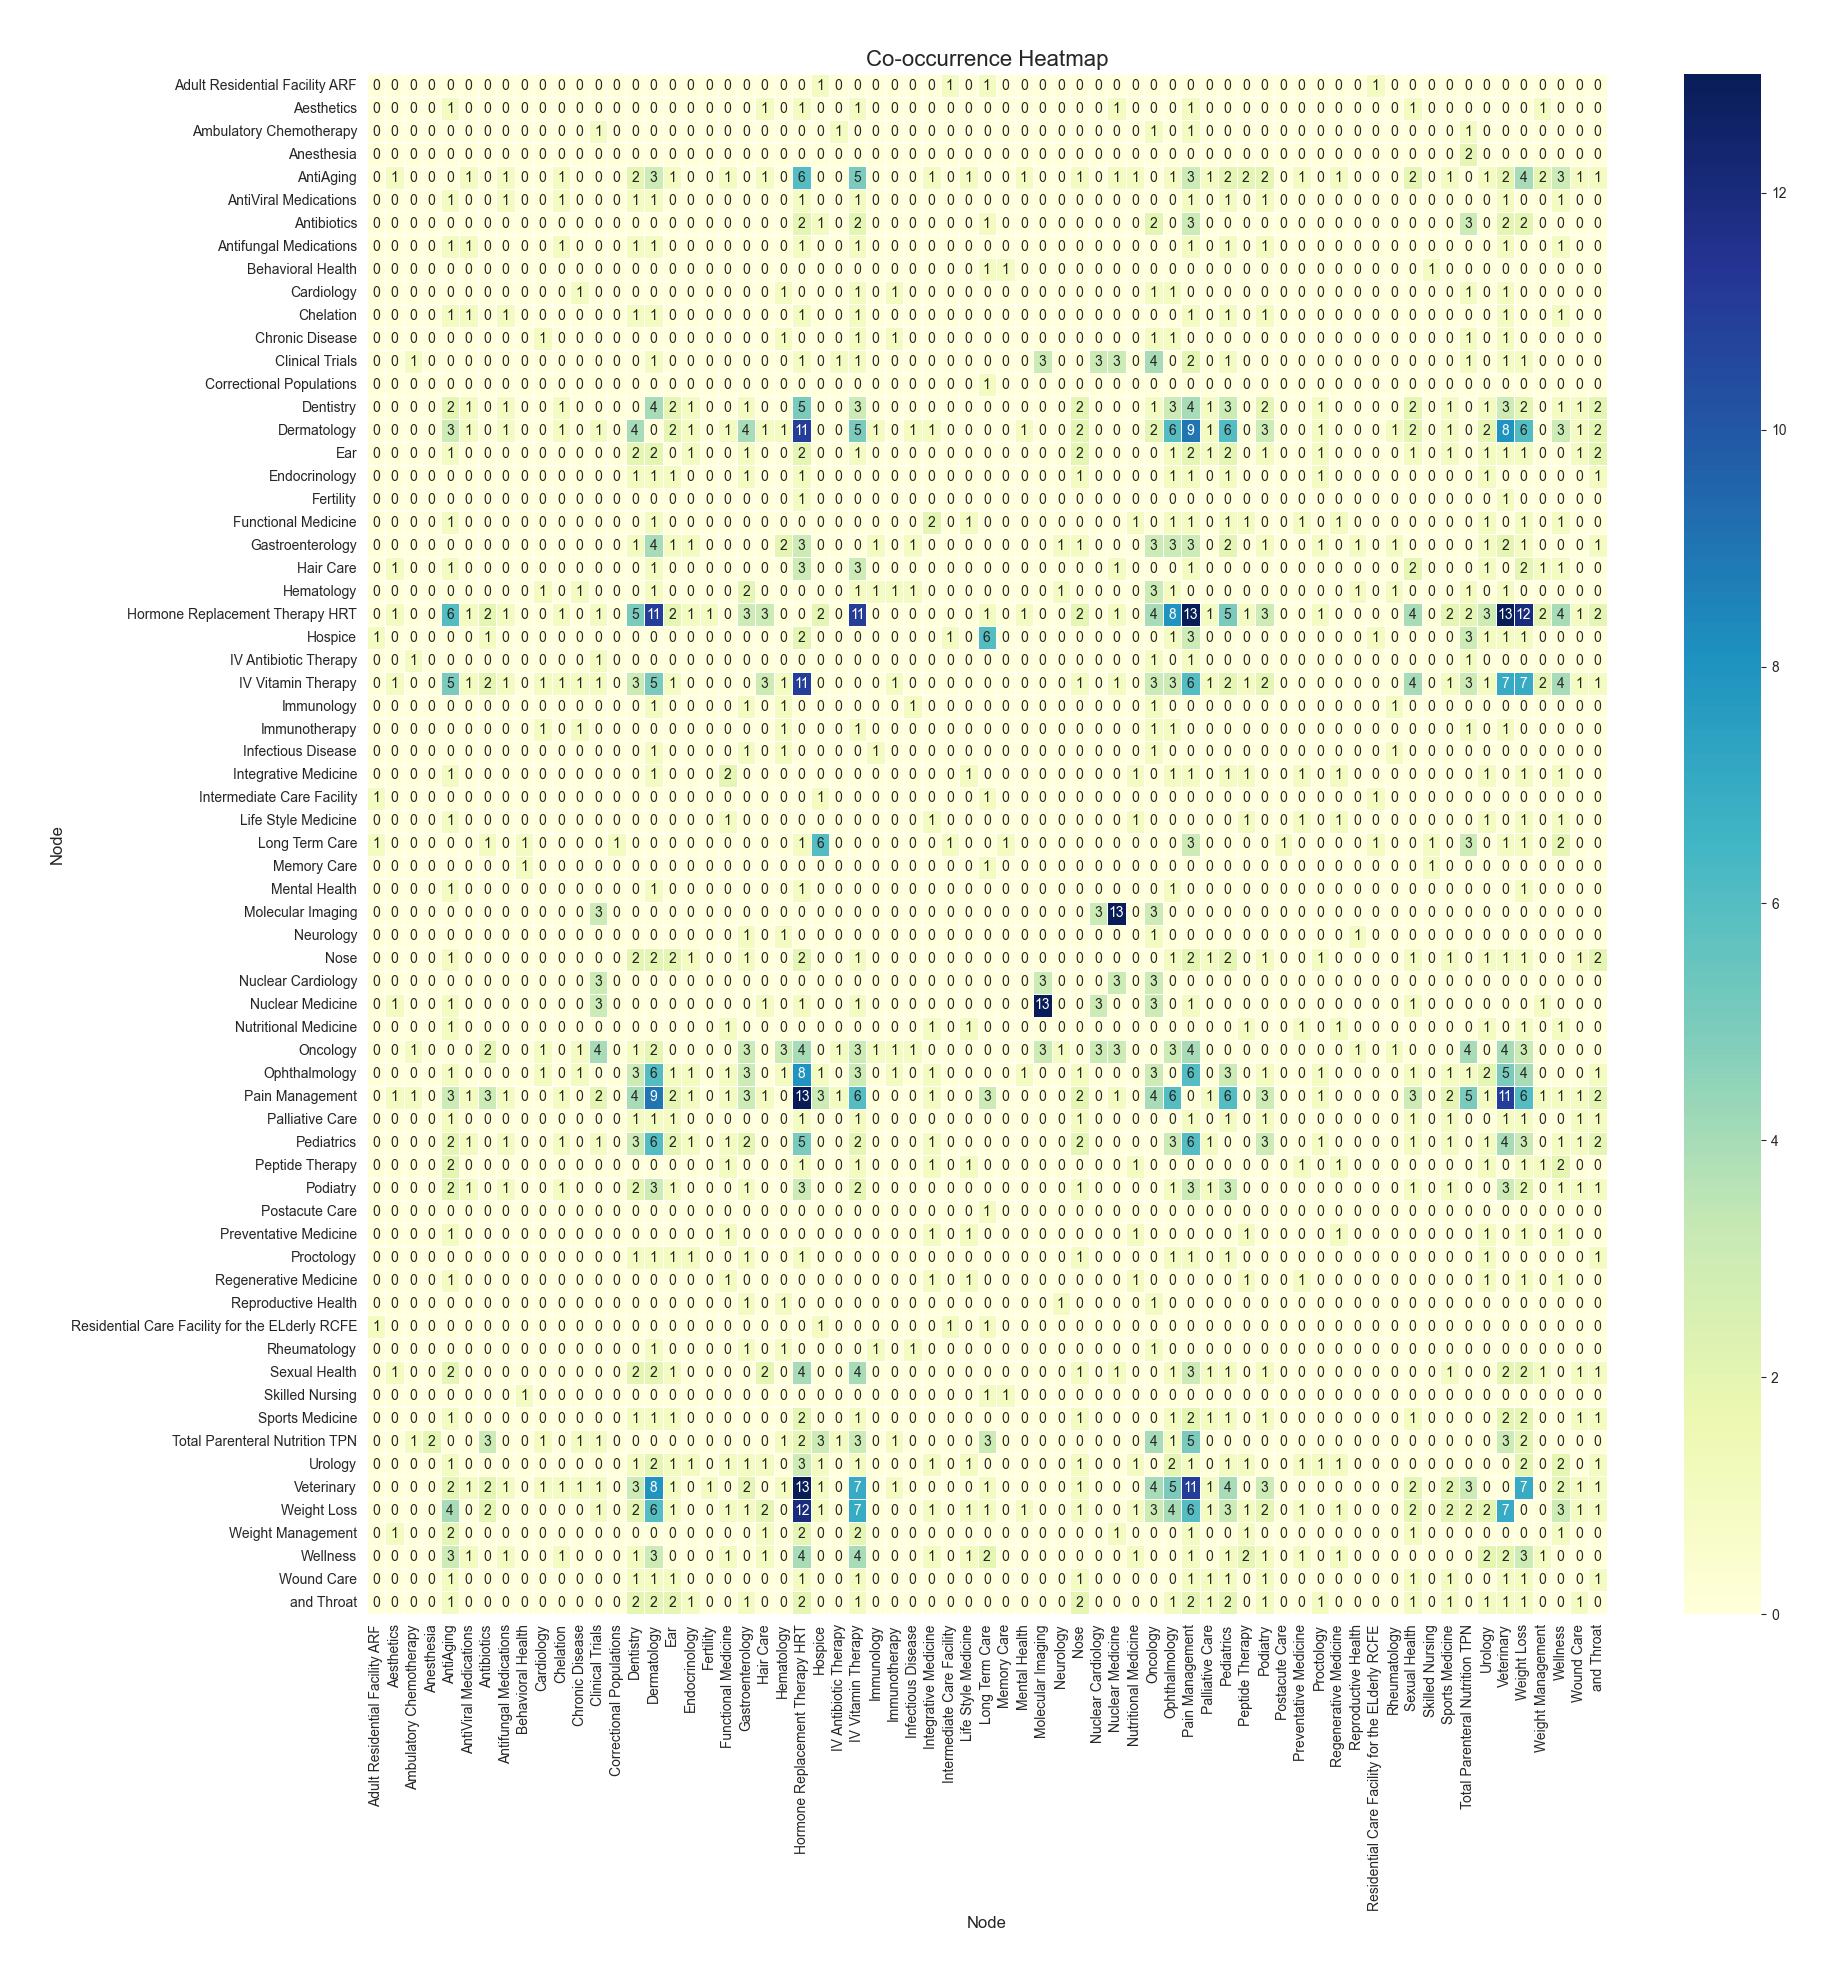

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(20, 20))
# Create the heatmap
sns.heatmap(co_occurrence_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5, cbar=True)

# Customize the plot for better readability
plt.title('Co-occurrence Heatmap', fontsize=16)
plt.xlabel('Node', fontsize=12)
plt.ylabel('Node', fontsize=12)

# Show the plot
plt.show()


In [170]:
import numpy as np
import plotly.graph_objects as go

# Prepare the labels (nodes)
labels = co_occurrence_df.columns.tolist()

# Prepare source-target pairs and values for the chords
sources = []
targets = []
values = []

threshold = 6  # Filter weak connections (adjust this threshold as needed)

# Loop through the upper triangle of the co-occurrence matrix (to avoid duplicates)
for i in range(len(co_occurrence_df)):
    for j in range(i + 1, len(co_occurrence_df)):
        value = co_occurrence_df.iloc[i, j]
        if value >= threshold:  # Only include connections above the threshold
            sources.append(i)
            targets.append(j)
            values.append(value)

# Create a chord diagram using Plotly (polar coordinates)
fig = go.Figure()

# Number of sectors (nodes)
n = len(labels)

# Define the angle for each sector (360 degrees / n)
angles = np.linspace(0, 360, n, endpoint=False)

# Create the arcs (sectors) with labels
for i, label in enumerate(labels):
    fig.add_trace(go.Scatterpolar(
        r=[1, 1],  # Radius for the arc
        theta=[angles[i], angles[i] + 360 / n],  # Define the angle range for the sector
        mode="lines",  # Plot as a line
        line=dict(color="blue", width=10),
        showlegend=False
    ))

    # Add labels on the outer edge of each sector
    fig.add_trace(go.Scatterpolar(
        r=[1.05, 1.05],  # Place the labels slightly outside the sectors
        theta=[angles[i] + 360 / n / 2, angles[i] + 360 / n / 2],  # Center the labels in the sector
        mode="text",
        text=[label],  # The name of the specialty
        textposition="top center",
        showlegend=False,
        textfont=dict(size=12, color="black")
    ))

# Create the chords (connections between sectors) with colored lines
for source, target, value in zip(sources, targets, values):
    start_angle = angles[source] + 360 / n / 2
    end_angle = angles[target] + 360 / n / 2

    # Assign unique colors to the chords based on source and target (for better distinction)
    chord_color = f'rgba({np.random.randint(0, 255)}, {np.random.randint(0, 255)}, {np.random.randint(0, 255)}, 0.7)'  # Random colors

    # Adjust the chord width by using the value directly for line width
    chord_width = value / threshold * 4  # Scale the width (adjust the scaling factor if necessary)
    
    fig.add_trace(go.Scatterpolar(
        r=[1, 1],  # Chord radius
        theta=[start_angle, end_angle],  # Chord angles
        mode="lines",
        line=dict(color=chord_color, width=chord_width),  # Adjust width and color based on co-occurrence value
        showlegend=False
    ))

# Customize layout for better interaction and appearance
fig.update_layout(
    title="Interactive Chord Diagram with Labels and Colored Connections",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=""),
        angularaxis=dict(showticklabels=False, ticks="")
    ),
    showlegend=True,
    hovermode="closest",
    width=1000,
    height=1000
)

# Show the plot
fig.show()


In [171]:
import numpy as np
import plotly.graph_objects as go

# Prepare the labels (nodes)
labels = co_occurrence_df.columns.tolist()

# Prepare source-target pairs and values for the chords
sources = []
targets = []
values = []

threshold = 6  # Filter weak connections (adjust this threshold as needed)

# Loop through the upper triangle of the co-occurrence matrix (to avoid duplicates)
for i in range(len(co_occurrence_df)):
    for j in range(i + 1, len(co_occurrence_df)):
        value = co_occurrence_df.iloc[i, j]
        if value >= threshold:  # Only include connections above the threshold
            sources.append(i)
            targets.append(j)
            values.append(value)

# Create a chord diagram using Plotly (polar coordinates)
fig = go.Figure()

# Number of sectors (nodes)
n = len(labels)

# Define the angle for each sector (360 degrees / n)
angles = np.linspace(0, 360, n, endpoint=False)

# Create the arcs (sectors) with labels
for i, label in enumerate(labels):
    fig.add_trace(go.Scatterpolar(
        r=[1, 1],  # Radius for the arc
        theta=[angles[i], angles[i] + 360 / n],  # Define the angle range for the sector
        mode="lines",  # Plot as a line
        line=dict(color="blue", width=10),
        showlegend=False
    ))

    # Add labels on the outer edge of each sector
    fig.add_trace(go.Scatterpolar(
        r=[1.05, 1.05],  # Place the labels slightly outside the sectors
        theta=[angles[i] + 360 / n / 2, angles[i] + 360 / n / 2],  # Center the labels in the sector
        mode="text",
        text=[label],  # The name of the specialty
        textposition="top center",
        showlegend=False,
        textfont=dict(size=12, color="black")
    ))

# Create the chords (connections between sectors) with colored lines and hover data
for source, target, value in zip(sources, targets, values):
    start_angle = angles[source] + 360 / n / 2
    end_angle = angles[target] + 360 / n / 2

    # Assign unique colors to the chords based on source and target (for better distinction)
    chord_color = f'rgba({np.random.randint(0, 255)}, {np.random.randint(0, 255)}, {np.random.randint(0, 255)}, 0.7)'  # Random colors

    # Adjust the chord width by using the value directly for line width
    chord_width = value / threshold * 4  # Scale the width (adjust the scaling factor if necessary)
    
    # Hover text with detailed information about the co-occurrence
    hover_text = f"{labels[source]} → {labels[target]}<br>Count: {value}"

    fig.add_trace(go.Scatterpolar(
        r=[1, 1],  # Chord radius
        theta=[start_angle, end_angle],  # Chord angles
        mode="lines",
        line=dict(color=chord_color, width=chord_width),  # Adjust width and color based on co-occurrence value
        showlegend=False,
        hoverinfo="text",  # Show hover information
        hovertext=hover_text  # Show the source, target, and co-occurrence count
    ))

# Customize layout for better interaction and appearance
fig.update_layout(
    title="Interactive Chord Diagram with Labels, Colored Connections, and Hover Info",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=""),
        angularaxis=dict(showticklabels=False, ticks="")
    ),
    showlegend=True,
    hovermode="closest",
    width=1000,
    height=1000
)

# Show the plot
fig.show()


# Conditions

In [172]:
import pandas as pd
import itertools
from collections import Counter
import numpy as np
import re

# Create a dataset to analyze
conditions = pharmacies.copy()

# Drop rows with NaN values in the 'Conditions' column
conditions.dropna(subset=['Conditions'], inplace=True)

# Ensure the 'Conditions' column contains only strings (in case of non-string values)
conditions['Conditions'] = conditions['Conditions'].apply(lambda x: str(x) if isinstance(x, (str, bytes)) else '')

# Define a function to clean the terms by removing unwanted punctuation
def clean_term(term):
    # Remove any unwanted punctuation (e.g., commas, periods, etc.) but keep spaces between words
    term = re.sub(r'[^\w\s]', '', term)
    # Remove extra spaces, just in case
    term = term.strip()
    return term

# 1. Flatten all lists from the 'Conditions' column by splitting on commas
# First, make sure each term in the list is separated correctly
all_terms = list(itertools.chain(*conditions['Conditions'].apply(lambda x: x.split(','))))

# Apply the cleaning function to each term
cleaned_terms = [clean_term(term) for term in all_terms]

# 2. Generate unique terms
unique_terms = sorted(set(cleaned_terms))

# 3. Create a co-occurrence matrix
co_occurrence = Counter()

# Iterate through each row (list of specialties) and count co-occurrences
for specialties in conditions['Conditions']:
    # Split the string into a list of terms based on commas
    cleaned_specialties = [clean_term(term) for term in specialties.split(',')]
    
    # Count co-occurrences for all pairs in the cleaned specialties list
    for pair in itertools.combinations(cleaned_specialties, 2):
        # Sort each pair to ensure (A, B) is treated the same as (B, A)
        co_occurrence[tuple(sorted(pair))] += 1

# 4. Convert the co-occurrence dictionary into a matrix
co_occurrence_matrix = np.zeros((len(unique_terms), len(unique_terms)), dtype=int)

# Map each term to an index
term_index = {term: idx for idx, term in enumerate(unique_terms)}

# Populate the matrix
for (term1, term2), count in co_occurrence.items():
    i, j = term_index[term1], term_index[term2]
    co_occurrence_matrix[i, j] = count
    co_occurrence_matrix[j, i] = count  # Ensure symmetry for undirected matrix

# 5. Convert the matrix into a pandas DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=unique_terms, columns=unique_terms)

# Now, co_occurrence_df contains the co-occurrence matrix of terms.
print(co_occurrence_df)


                            Acne  Addiction  Adrenal Fatigue  Alzheimers  \
Acne                           0          0                0           0   
Addiction                      0          0                0           0   
Adrenal Fatigue                0          0                0           0   
Alzheimers                     0          0                0           0   
Alzheimers Disease             0          0                0           0   
...                          ...        ...              ...         ...   
Traumatic Brain Injury TBI     0          0                0           1   
Ulcerative Colitis             0          0                0           1   
Vaginitis                      0          0                0           0   
Warts                          0          1                0           0   
Wound Care                     0          1                0           0   

                            Alzheimers Disease  Anemia  Anxiety  \
Acne                

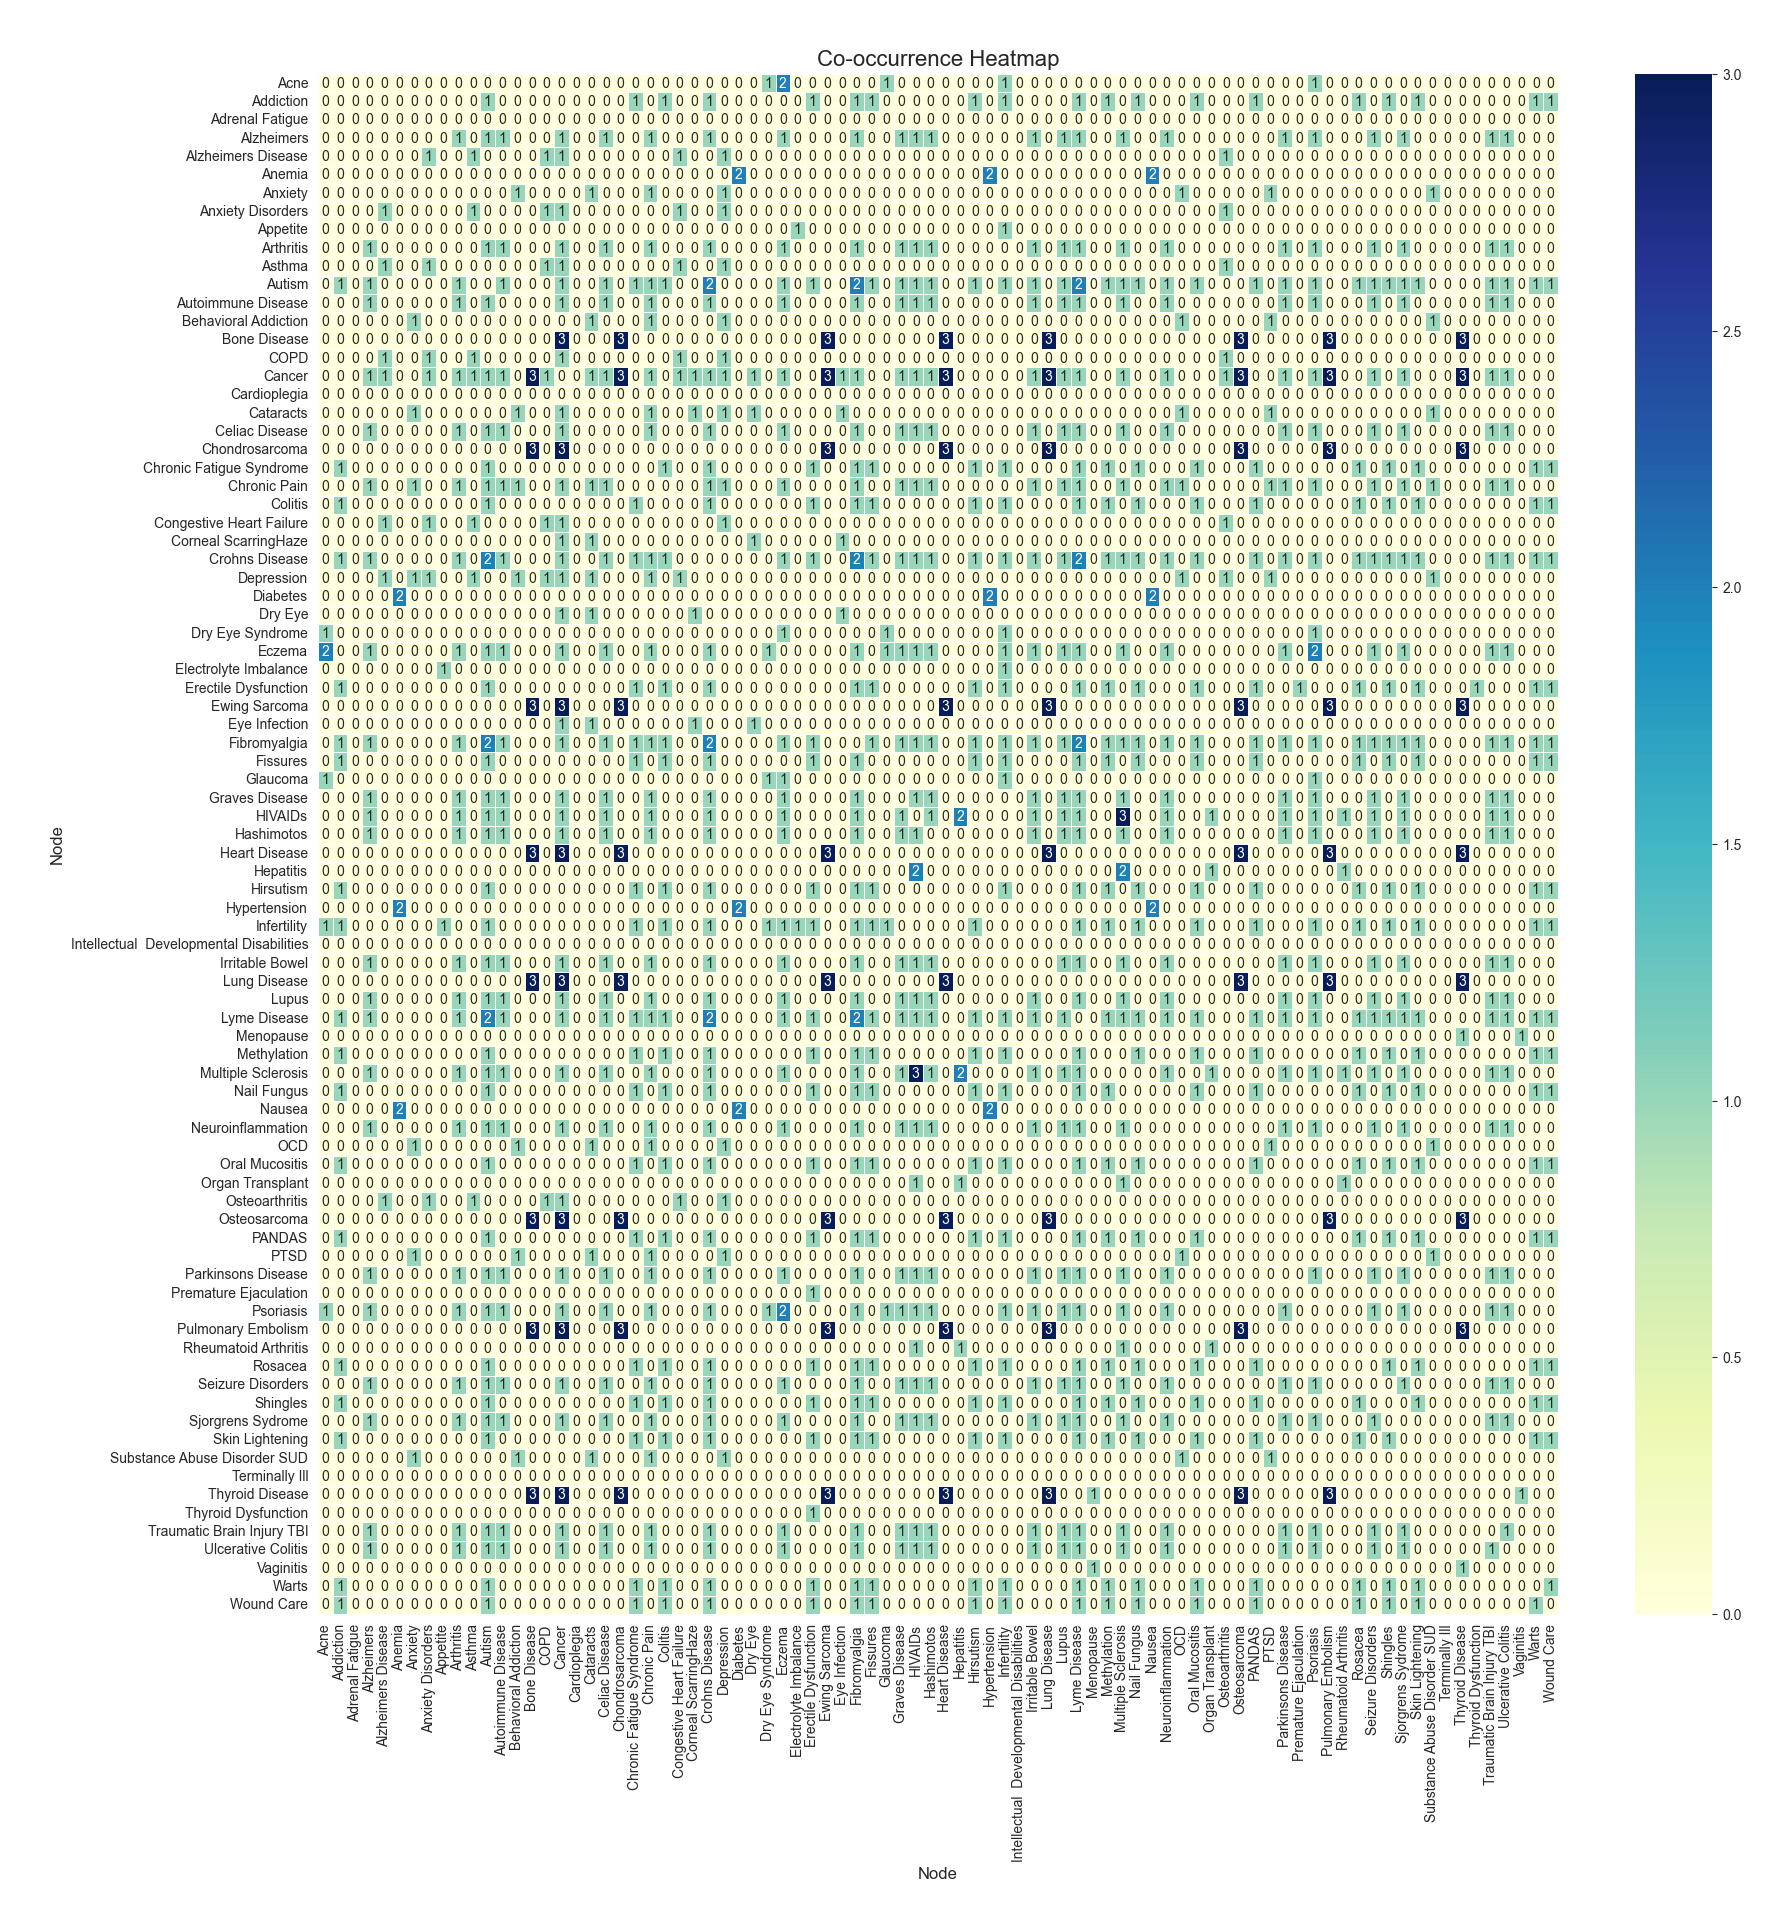

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(20, 20))
# Create the heatmap
sns.heatmap(co_occurrence_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5, cbar=True)

# Customize the plot for better readability
plt.title('Co-occurrence Heatmap', fontsize=16)
plt.xlabel('Node', fontsize=12)
plt.ylabel('Node', fontsize=12)

# Show the plot
plt.show()


In [174]:
import numpy as np
import plotly.graph_objects as go

# Prepare the labels (nodes)
labels = co_occurrence_df.columns.tolist()

# Prepare source-target pairs and values for the chords
sources = []
targets = []
values = []

threshold = 3  # Filter weak connections (adjust this threshold as needed)

# Loop through the upper triangle of the co-occurrence matrix (to avoid duplicates)
for i in range(len(co_occurrence_df)):
    for j in range(i + 1, len(co_occurrence_df)):
        value = co_occurrence_df.iloc[i, j]
        if value >= threshold:  # Only include connections above the threshold
            sources.append(i)
            targets.append(j)
            values.append(value)

# Create a chord diagram using Plotly (polar coordinates)
fig = go.Figure()

# Number of sectors (nodes)
n = len(labels)

# Define the angle for each sector (360 degrees / n)
angles = np.linspace(0, 360, n, endpoint=False)

# Create the arcs (sectors) with labels
for i, label in enumerate(labels):
    fig.add_trace(go.Scatterpolar(
        r=[1, 1],  # Radius for the arc
        theta=[angles[i], angles[i] + 360 / n],  # Define the angle range for the sector
        mode="lines",  # Plot as a line
        line=dict(color="blue", width=10),
        showlegend=False
    ))

    # Add labels on the outer edge of each sector
    fig.add_trace(go.Scatterpolar(
        r=[1.05, 1.05],  # Place the labels slightly outside the sectors
        theta=[angles[i] + 360 / n / 2, angles[i] + 360 / n / 2],  # Center the labels in the sector
        mode="text",
        text=[label],  # The name of the specialty
        textposition="top center",
        showlegend=False,
        textfont=dict(size=12, color="black")
    ))

# Create the chords (connections between sectors) with colored lines and hover data
for source, target, value in zip(sources, targets, values):
    start_angle = angles[source] + 360 / n / 2
    end_angle = angles[target] + 360 / n / 2

    # Assign unique colors to the chords based on source and target (for better distinction)
    chord_color = f'rgba({np.random.randint(0, 255)}, {np.random.randint(0, 255)}, {np.random.randint(0, 255)}, 0.7)'  # Random colors

    # Adjust the chord width by using the value directly for line width
    chord_width = value / threshold * 4  # Scale the width (adjust the scaling factor if necessary)
    
    # Hover text with detailed information about the co-occurrence
    hover_text = f"{labels[source]} → {labels[target]}<br>Count: {value}"

    fig.add_trace(go.Scatterpolar(
        r=[1, 1],  # Chord radius
        theta=[start_angle, end_angle],  # Chord angles
        mode="lines",
        line=dict(color=chord_color, width=chord_width),  # Adjust width and color based on co-occurrence value
        showlegend=False,
        hoverinfo="text",  # Show hover information
        hovertext=hover_text  # Ensure this is used for hovertext
    ))

# Customize layout for better interaction and appearance
fig.update_layout(
    title="Interactive Chord Diagram with Labels, Colored Connections, and Hover Info",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=""),
        angularaxis=dict(showticklabels=False, ticks=""),
    ),
    showlegend=True,
    hovermode="closest",
    width=1000,
    height=1000
)

# Show the plot
fig.show()
